In [1]:
# Evaluation Projects
# Name : Sayyed Mudassar Iqbal Shakil Ahmed
# Batch : DSG2404
# Subject : Avocado Project 1 Solution

# Loading our Dataset

In [2]:
#reading the csv file using pandas
import pandas as pd
df=pd.read_csv("Avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [3]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [4]:
#rows*columns
df.shape

(16468, 14)

There are certain empty cells in the data which shall be dropped for ease of processing

In [5]:
#checking for null values
df.isnull().sum()

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

Dropping null values

In [6]:
#dropping the null values in dataset
df.dropna(subset=['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],inplace=True)

In [7]:
#checking if the null values are dropped
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Thus our data is free from null values 

In [8]:
df.shape

(1517, 14)

In [9]:
df.nunique()

Unnamed: 0        52
Date             104
AveragePrice     113
Total Volume    1517
4046            1517
4225            1517
4770            1516
Total Bags      1517
Small Bags      1517
Large Bags      1377
XLarge Bags      711
type               1
year               2
region            51
dtype: int64

There is only one type of avocado i.e. conventional type 

The data is taken for year 2015 and 2016

In [10]:
df['region'].value_counts()

region
California             76
Albany                 67
BaltimoreWashington    65
Boise                  65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Tampa                  34
Louisville             34
Charlotte              31
Portland               30
Houston                29
NorthernNewEngland     29
WestTexNewMexico       27
Nashville              25
TotalUS                25
Denver                 24
SouthCarolina          24
Chicago                23
GrandRapids            23
Pittsburgh             22
Orlando                21
RichmondNorfolk        21
Syracuse               19
HarrisburgScranton     19
Midsouth               18
GreatLakes             18
DallasFtWorth          17
MiamiFtLauderdale      17
Roano

In [11]:
#checking the data type
df.dtypes

Unnamed: 0      float64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

There are only three string values: 1) date 2) type 3) region

In [12]:
#making a copy of the data to use for classification problem
df_class=df.copy()

# EDA

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

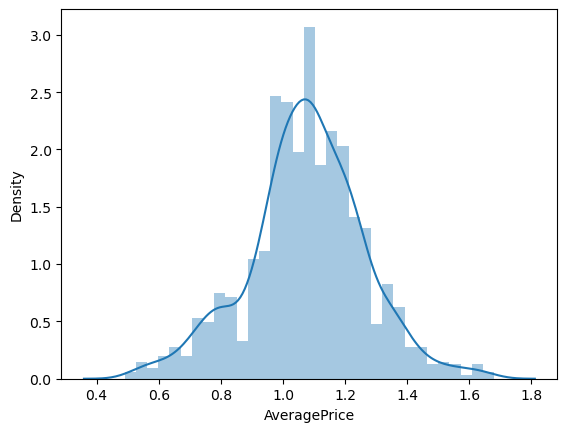

In [14]:
sns.distplot(df["AveragePrice"])
plt.show()

The data is left skewed with skewnes=-0.10944379239996417

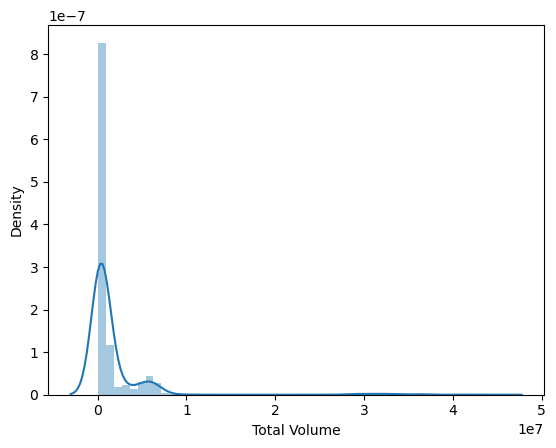

In [15]:
sns.distplot(df["Total Volume"])
plt.show()

The data has very high skew

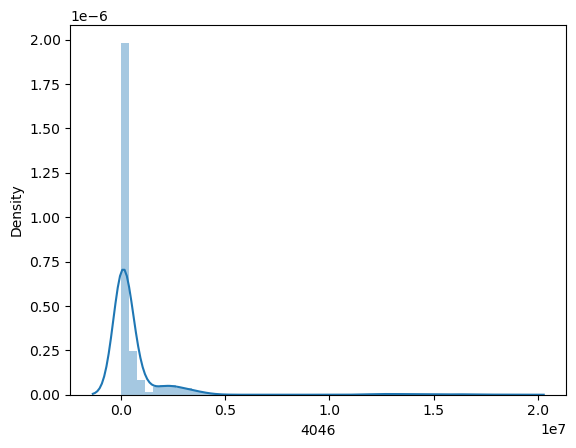

In [16]:
sns.distplot(df["4046"])
plt.show()

skewness is present

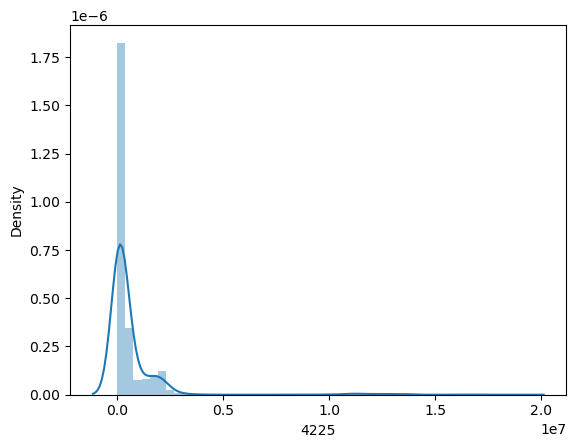

In [17]:
sns.distplot(df["4225"])
plt.show()

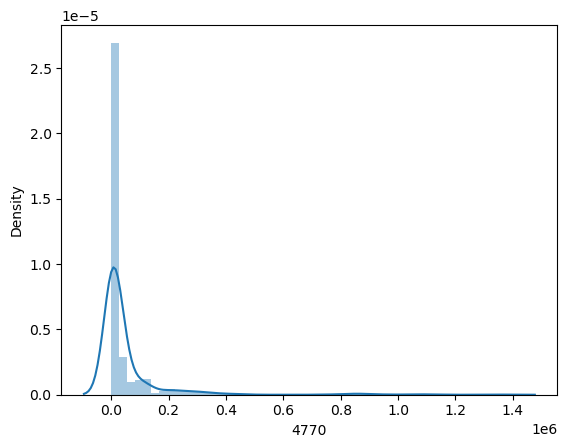

In [18]:
sns.distplot(df["4770"])
plt.show()

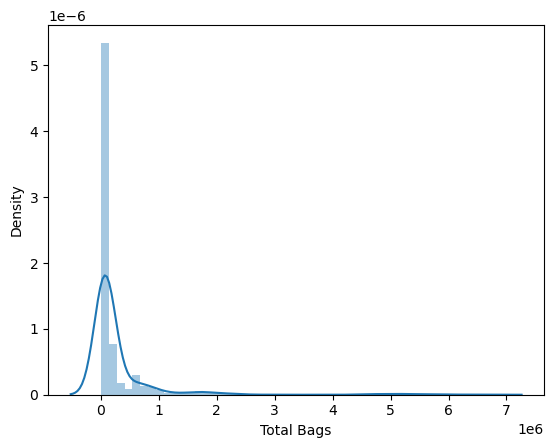

In [19]:
sns.distplot(df["Total Bags"])
plt.show()

the data has high right skewness with peak values

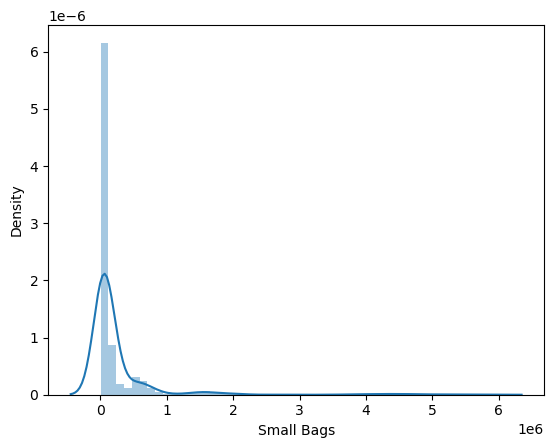

In [20]:
sns.distplot(df["Small Bags"])
plt.show()

The data is right skewed the median is very 

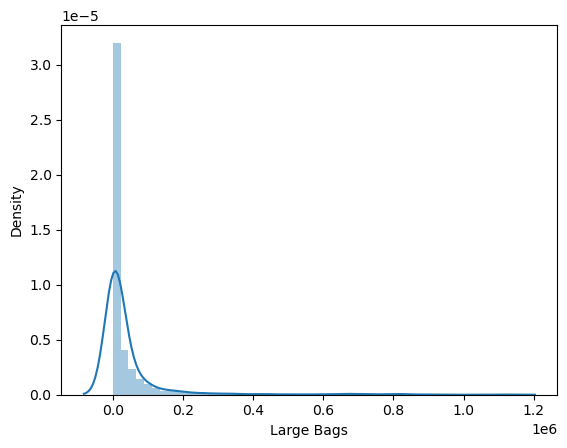

In [21]:
sns.distplot(df["Large Bags"])
plt.show()

data has skewness(right)

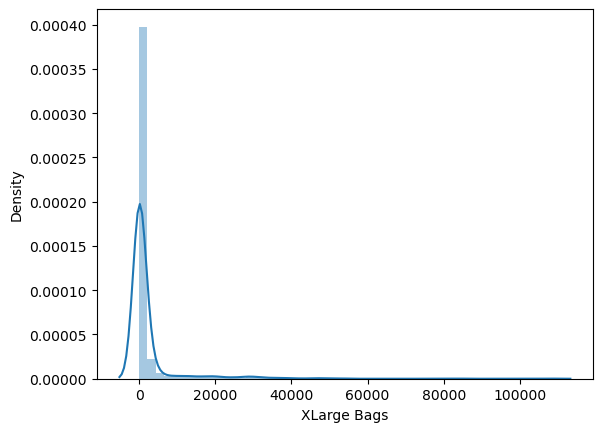

In [22]:
sns.distplot(df["XLarge Bags"])
plt.show()

The data is right skewed

<Figure size 1000x1500 with 0 Axes>

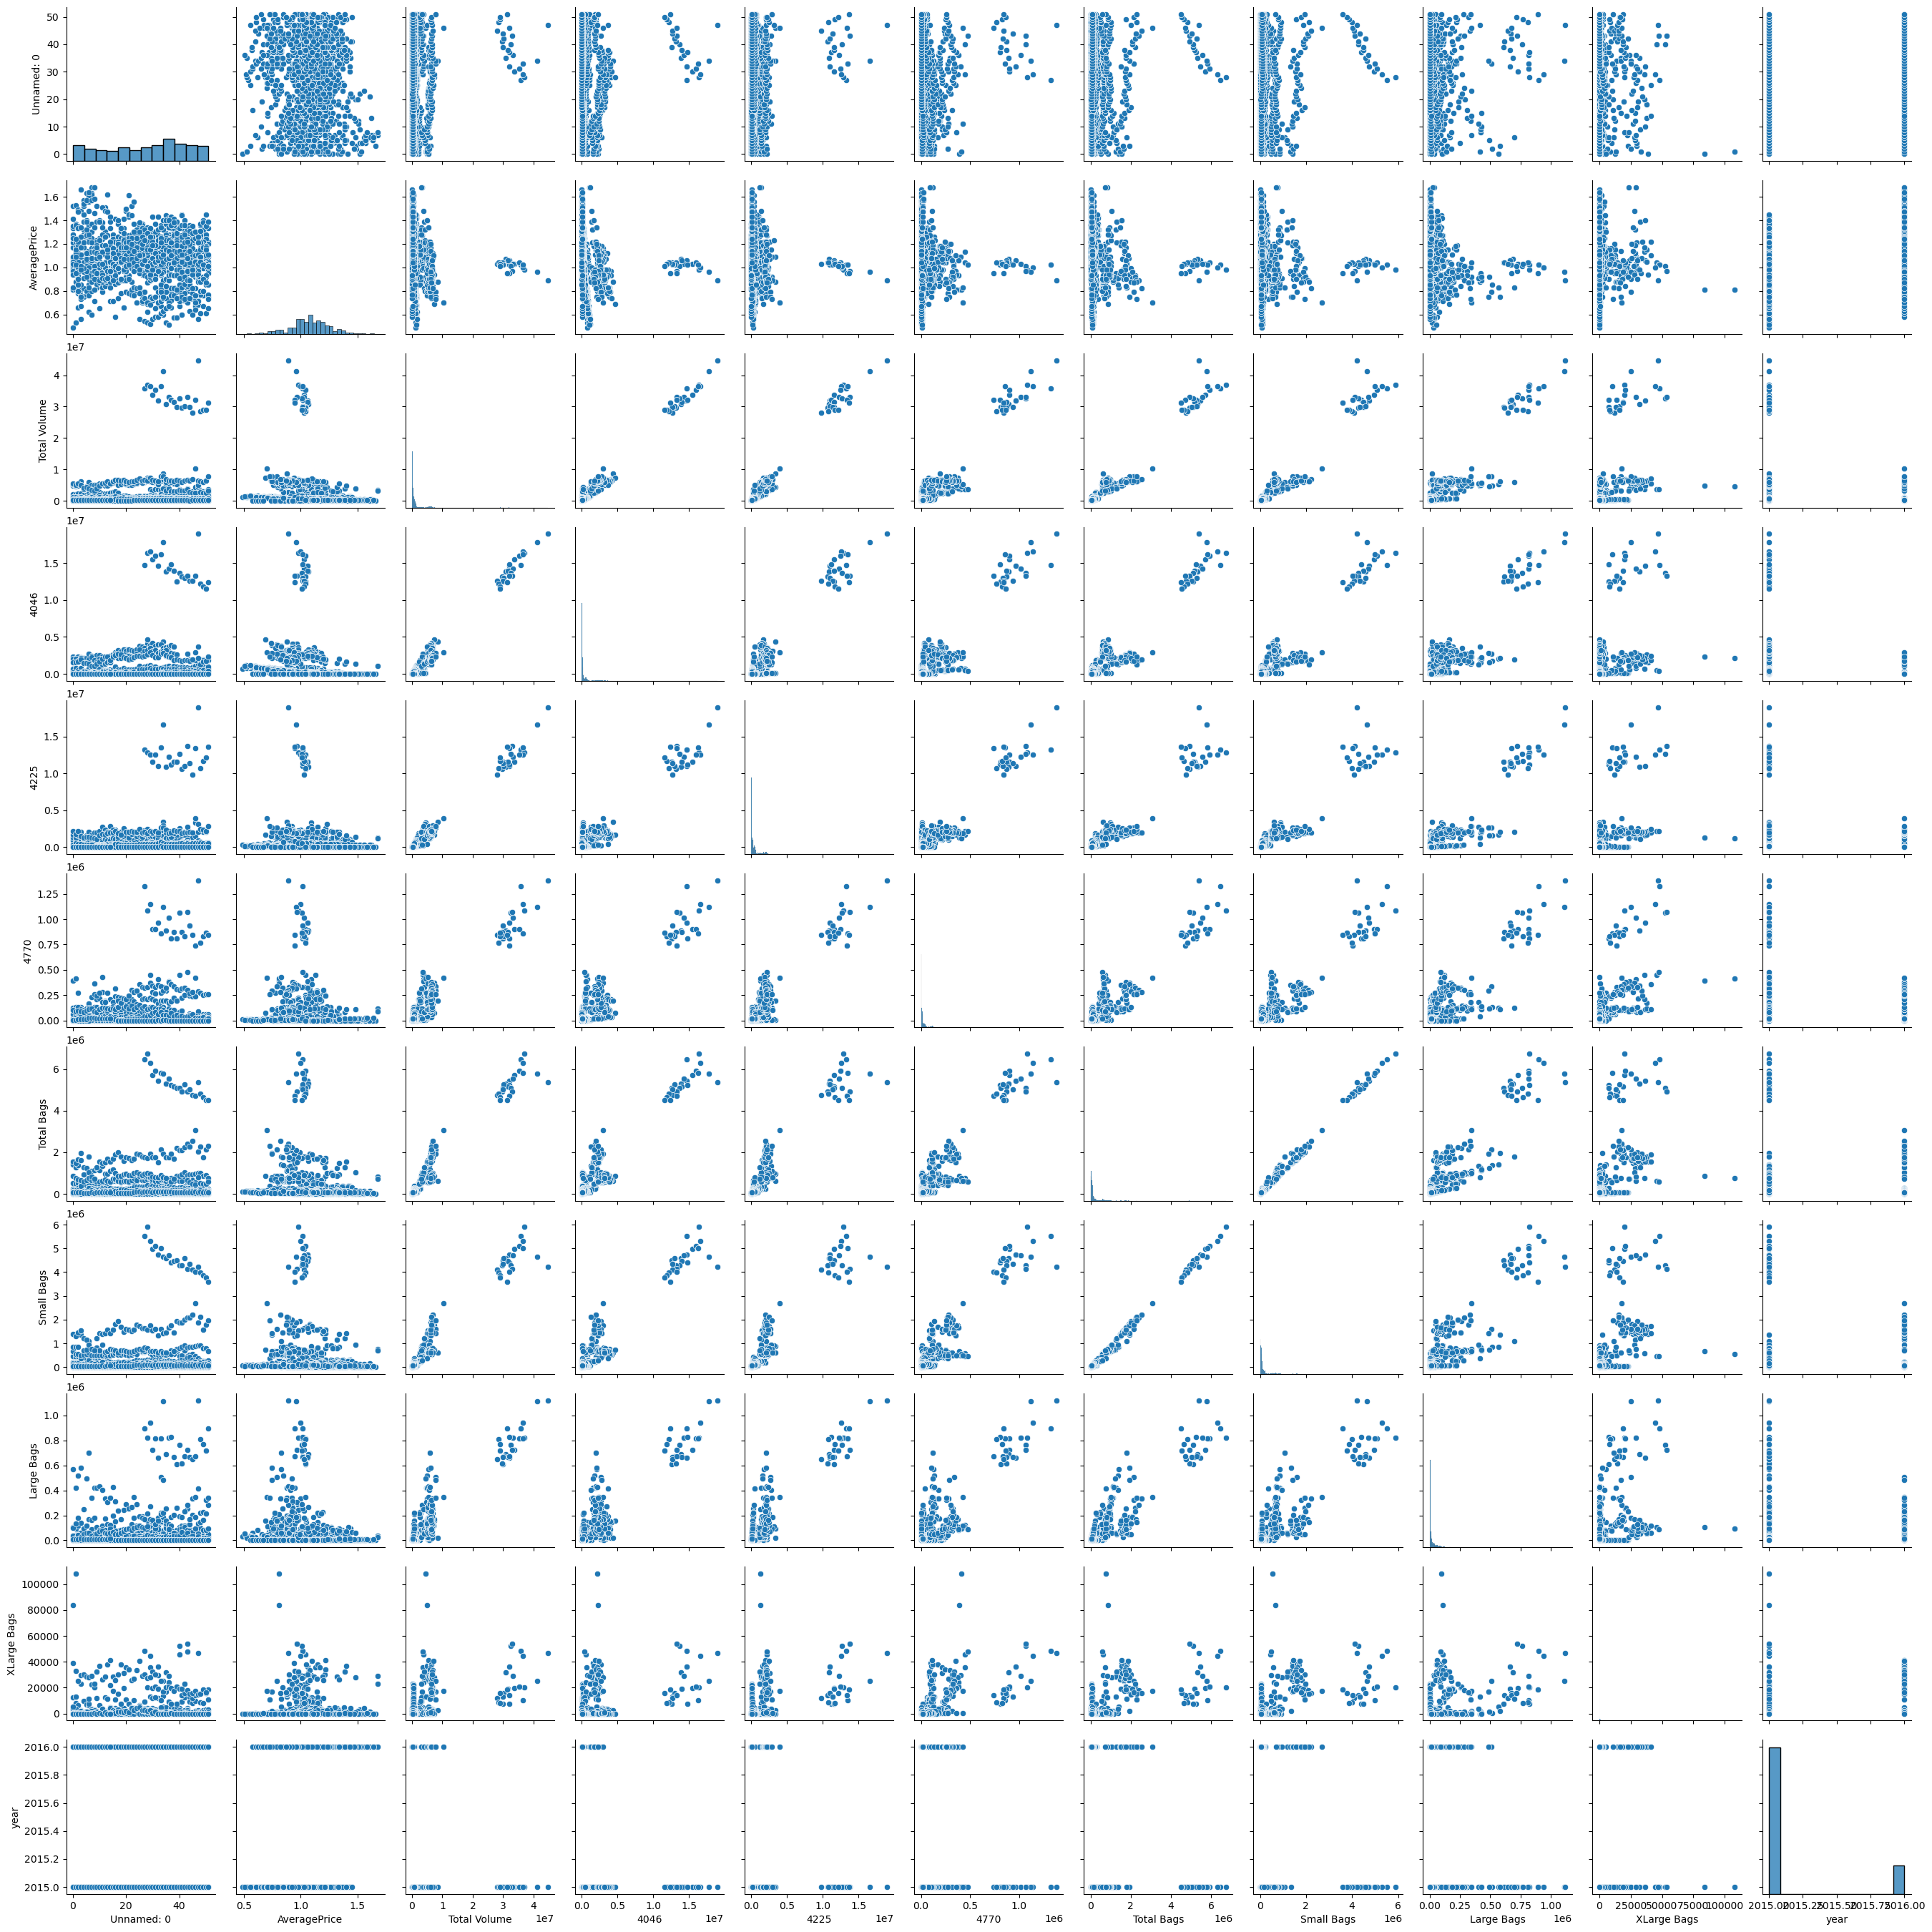

In [23]:
#plotting the relationship of various variables with each other
plt.figure(figsize=(10,15))
sns.pairplot(df)

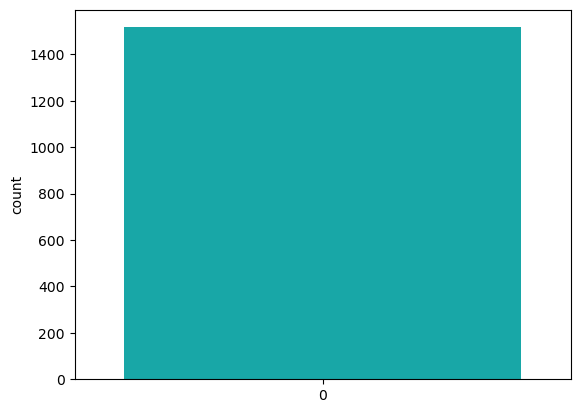

In [24]:
sns.countplot(df['year'],color='c')
plt.show()

# Data Preparation

In [27]:
import numpy as np 
# Filter out only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

print(correlation_matrix)


              Unnamed: 0  AveragePrice  Total Volume      4046      4225  \
Unnamed: 0      1.000000     -0.075531      0.091934  0.092013  0.093566   
AveragePrice   -0.075531      1.000000     -0.140470 -0.190096 -0.092084   
Total Volume    0.091934     -0.140470      1.000000  0.985568  0.987154   
4046            0.092013     -0.190096      0.985568  1.000000  0.951952   
4225            0.093566     -0.092084      0.987154  0.951952  1.000000   
4770            0.075647     -0.100567      0.934347  0.898570  0.927757   
Total Bags      0.081007     -0.111597      0.967689  0.930395  0.951779   
Small Bags      0.083485     -0.097682      0.960642  0.922278  0.943988   
Large Bags      0.065364     -0.177480      0.910226  0.884229  0.900496   
XLarge Bags    -0.050993     -0.048284      0.521717  0.474063  0.504718   
year           -0.012854      0.178683     -0.004189 -0.040439 -0.007254   

                  4770  Total Bags  Small Bags  Large Bags  XLarge Bags  \
Unnamed: 0  

#### Target variable=Average price

All the variables have negative correlation with the target variable

columns with least correlation with target are 1) unnamed:0 , 2)"4225" 3) "small Bags" 4) "Large Bags"

In [30]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,26.995386,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,14.848287,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,14.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,29.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,39.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


The standard deviation for "XLarge Bags" is the maximum (7455.712144)

For all the other variables there is no much difference between the mean and median

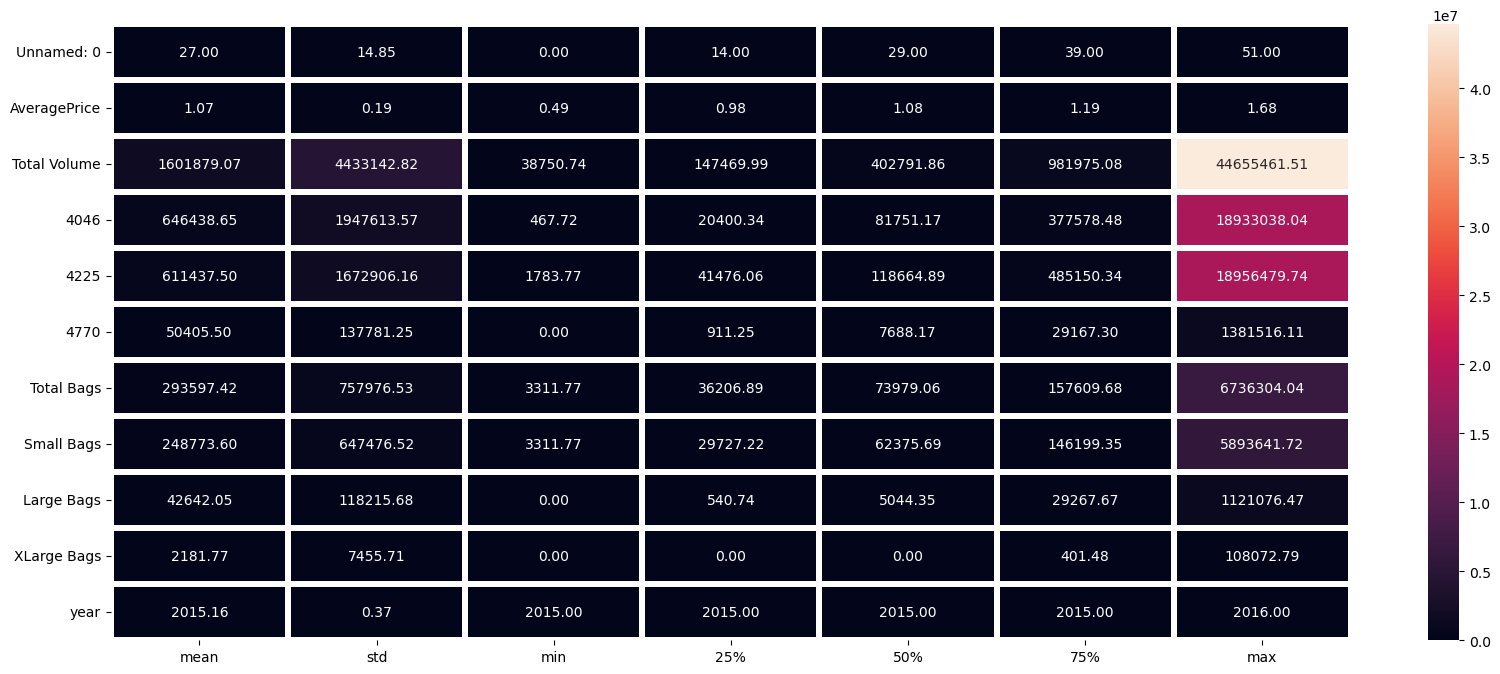

In [31]:
plt.figure(figsize=(20,8))
sns.heatmap(round(df.describe()[1:].transpose(),2),annot=True,fmt='.2f',linecolor='w',linewidth=3)
plt.show()

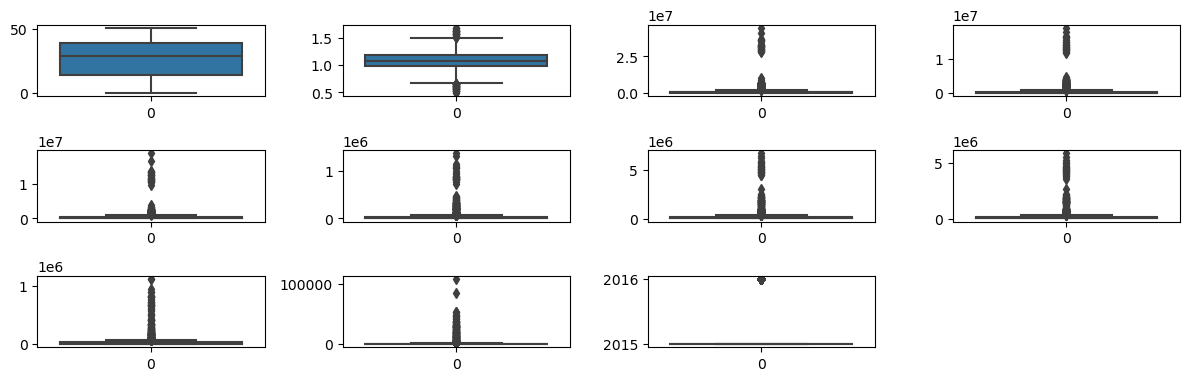

In [32]:
cols=['Unnamed: 0', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags',
       'year']
ncol=4
nrow=16
plt.figure(figsize=(3*ncol,5*ncol))
for i in range(0,len(cols)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(df[cols[i]],orient='v')
    plt.tight_layout()

we can observe there are outliers in almost every feature except for unnamed

In [33]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [34]:
#unnamed column has the least correlation and also the date column does not affect the target variable therefore we drop them
df.drop(['Unnamed: 0',"Date"],axis=1,inplace=True)
df.sample()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1116,1.37,178200.42,86967.98,42320.51,15.07,48896.86,48894.75,0.0,2.11,conventional,2015.0,StLouis


# Label Encoding 

As the "type","year" and "region" are in string formats we shall encode them

In [35]:
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder
code=["type","year","region"]
for j in code:
    Le=LabelEncoder()
    Le.fit(df[j])
    df[j]=Le.fit_transform(df[j])
    

In [36]:
df #thus the categorical values are encoded

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,0,1,7
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,0,1,7
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,0,1,7
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,0,1,7


In [37]:
from scipy.stats import zscore
import numpy as np

z=np.abs(zscore(df))
z

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.350481,0.346966,0.331490,0.333053,0.365608,0.375994,0.371055,0.360044,0.292727,NaN,0.441008,1.314338
1,1.456397,0.349078,0.331676,0.338923,0.365534,0.374927,0.369812,0.360008,0.292727,NaN,0.441008,1.314338
2,0.767838,0.334785,0.331614,0.300348,0.365010,0.376722,0.371922,0.359960,0.292727,NaN,0.441008,1.314338
3,0.026531,0.343636,0.331441,0.322576,0.365431,0.379802,0.375576,0.359701,0.292727,NaN,0.441008,1.314338
4,1.085691,0.349944,0.331539,0.339401,0.365408,0.379310,0.375098,0.359160,0.292727,NaN,0.441008,1.314338
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.668229,0.318397,0.302475,0.331910,0.238672,0.309055,0.308916,0.273213,0.260489,NaN,2.267532,0.880286
1513,2.303724,0.321242,0.309770,0.334407,0.224966,0.303931,0.299831,0.288090,0.292727,NaN,2.267532,0.880286
1514,2.144850,0.321203,0.308209,0.333987,0.244443,0.305099,0.301950,0.290953,0.182037,NaN,2.267532,0.880286
1515,2.091892,0.318784,0.304230,0.333568,0.238936,0.303098,0.298364,0.290783,0.292727,NaN,2.267532,0.880286


In [38]:
threshold=3
print(np.where(z>3))

(array([ 398,  401,  409,  412,  412,  760, 1016, 1017, 1059, 1182, 1182,
       1182, 1182, 1182, 1182, 1182, 1182, 1183, 1183, 1183, 1183, 1183,
       1183, 1183, 1184, 1184, 1184, 1184, 1184, 1184, 1184, 1184, 1185,
       1185, 1185, 1185, 1185, 1185, 1185, 1186, 1186, 1186, 1186, 1186,
       1186, 1186, 1187, 1187, 1187, 1187, 1187, 1187, 1187, 1187, 1188,
       1188, 1188, 1188, 1188, 1188, 1188, 1189, 1189, 1189, 1189, 1189,
       1189, 1189, 1189, 1190, 1190, 1190, 1190, 1190, 1190, 1190, 1190,
       1191, 1191, 1191, 1191, 1191, 1191, 1191, 1191, 1192, 1192, 1192,
       1192, 1192, 1192, 1192, 1193, 1193, 1193, 1193, 1193, 1193, 1193,
       1194, 1194, 1194, 1194, 1194, 1194, 1194, 1195, 1195, 1195, 1195,
       1195, 1195, 1195, 1195, 1196, 1196, 1196, 1196, 1196, 1196, 1196,
       1197, 1197, 1197, 1197, 1197, 1197, 1197, 1198, 1198, 1198, 1198,
       1198, 1198, 1198, 1198, 1199, 1199, 1199, 1199, 1199, 1199, 1199,
       1200, 1200, 1200, 1200, 1200, 1200, 1200, 1

In [39]:
df_new=df[(z<3).all(axis=1)]
print("original shape=",df.shape)
print("new shape=",df_new.shape)

original shape= (1517, 12)
new shape= (0, 12)


As the data loss will be 100% we cannot drop them and shall try other methods to overcome the effect of outliers

In [40]:
#checking skewness
df.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
type            0.000000
year            1.828332
region          0.288146
dtype: float64

As compared to the acceptable skewness most of the features have very high skew

columns with less skewness are:
    
AveragePrice

type

region

# Standard Scaling

In [41]:
df.sample()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
490,1.14,149319.82,2910.77,103890.9,2048.78,40469.37,22405.47,17913.92,149.98,0,0,18


In [42]:
#assigning features and target to variables
x=df.drop(["AveragePrice"],axis=1)
y=df["AveragePrice"]

In [43]:
#standard scailing
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x= sc.fit_transform(x)

In [44]:
x=pd.DataFrame(x)
x

,0,1,2,3,4,5,6,7,8,9,10
0,-0.346966,-0.331490,-0.333053,-0.365608,-0.375994,-0.371055,-0.360044,-0.292727,0.0,-0.441008,-1.314338
1,-0.349078,-0.331676,-0.338923,-0.365534,-0.374927,-0.369812,-0.360008,-0.292727,0.0,-0.441008,-1.314338
2,-0.334785,-0.331614,-0.300348,-0.365010,-0.376722,-0.371922,-0.359960,-0.292727,0.0,-0.441008,-1.314338
3,-0.343636,-0.331441,-0.322576,-0.365431,-0.379802,-0.375576,-0.359701,-0.292727,0.0,-0.441008,-1.314338
4,-0.349944,-0.331539,-0.339401,-0.365408,-0.379310,-0.375098,-0.359160,-0.292727,0.0,-0.441008,-1.314338
...,...,...,...,...,...,...,...,...,...,...,...
1512,-0.318397,-0.302475,-0.331910,-0.238672,-0.309055,-0.308916,-0.273213,-0.260489,0.0,2.267532,-0.880286
1513,-0.321242,-0.309770,-0.334407,-0.224966,-0.303931,-0.299831,-0.288090,-0.292727,0.0,2.267532,-0.880286
1514,-0.321203,-0.308209,-0.333987,-0.244443,-0.305099,-0.301950,-0.290953,-0.182037,0.0,2.267532,-0.880286
1515,-0.318784,-0.304230,-0.333568,-0.238936,-0.303098,-0.298364,-0.290783,-0.292727,0.0,2.267532,-0.880286


# Power transformation to reduce skewness

In [45]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

#### Selecting the best random state

In [46]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

best_rstate=0
accu=0

for i in range(30,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    y_pred=mod.predict(x_test)
    tempaccu=r2_score(y_test,y_pred)
    cscore=cross_val_score(mod,x,y,cv=5).mean()
    
    
    if tempaccu>accu:
        accu=tempaccu
        best_rstate=i
        
        
print('Best accuracy is ',(accu*100),'found on random state',(best_rstate),'with cross validation=',(cscore*100))

Best accuracy is  51.60103748896721 found on random state 179 with cross validation= 16.827877603073137


In [47]:
#using the best random state
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=179)

In [48]:
#checking for various algorithms using loop
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso,Ridge,ElasticNet

models=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(),Ridge(),ElasticNet()]

for i in models:
    i.fit(x_train,y_train)
    pred_y=i.predict(x_test)
    print("for",i,"algorithm")
    print(f"r2 score is",(r2_score(y_test,pred_y)*100))
    cross_score=cross_val_score(i,x,y,cv=3).mean()*100
    print("cross validation score is",cross_score)
    print('\n')
    

for LinearRegression() algorithm
r2 score is 51.60103748896721
cross validation score is 26.17398988845273


for DecisionTreeRegressor() algorithm
r2 score is 69.26161754427906
cross validation score is -26.527247210852273


for KNeighborsRegressor() algorithm
r2 score is 84.06161794384208
cross validation score is 8.621236123365168


for Lasso() algorithm
r2 score is -0.40570516572708826
cross validation score is -0.8796381756158933


for Ridge() algorithm
r2 score is 51.43501131144587
cross validation score is 27.19333330058405


for ElasticNet() algorithm
r2 score is -0.40570516572708826
cross validation score is -0.8796381756158933




The combination of good r2 score and cross validation is obtained for linear regressor therefore we shall use it for training the model

# Linear regressor

In [49]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np
Lr=LinearRegression()
Lr.fit(x_train,y_train)
y_pred=Lr.predict(x_test)
print("r2 score=",r2_score(y_test,y_pred)*100)
cv=cross_val_score(Lr,x,y,cv=3).mean()*100
print("cross validation score is",cv)
print("mean absolute error=",mean_absolute_error(y_test,y_pred))
print("mean squared error=",mean_squared_error(y_test,y_pred))
print("root mean squared error=",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score= 51.60103748896721
cross validation score is 26.17398988845273
mean absolute error= 0.11181127889040661
mean squared error= 0.01912574796435488
root mean squared error= 0.1382958711037856


# Best fit line

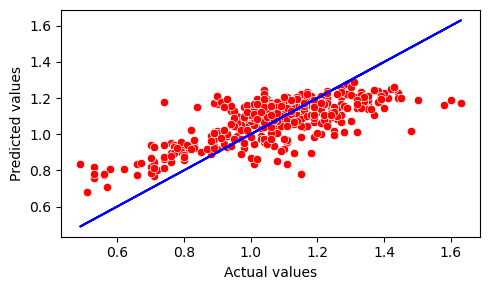

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))
sns.scatterplot(x=y_test, y=y_pred, color='r')
plt.plot(y_test, y_test, color='b')  # Line for reference
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.tight_layout()
plt.show()


Thus we can see that the best fit line covers almost all the actual values i.e predicted and actual values will be similar

In [52]:
Lr.intercept_

1.0763390567417204

In [53]:
Lr.coef_

array([-2.02657228e-01, -6.70862189e-02,  7.59499038e-02, -7.82352786e-03,
       -1.72797315e-01,  2.71049392e-01,  5.71058165e-02,  6.35467800e-03,
        2.77555756e-17,  4.01788815e-03, -1.21889711e-02])

# Saving the trained model

In [54]:
import pickle
filename='Avocado_model.pkl'
pickle.dump(Lr,open(filename,'wb'))  #saving the best model (KNN)

In [55]:
#saving the actual values in an array
import numpy as np
a=np.array(y_test)
a

array([0.9 , 1.  , 1.08, 1.18, 1.26, 1.21, 1.05, 1.37, 1.07, 0.89, 1.17,
       0.7 , 0.66, 0.99, 0.98, 0.98, 1.04, 0.89, 1.09, 1.16, 1.15, 0.71,
       0.71, 1.1 , 1.22, 1.08, 1.04, 1.09, 1.15, 1.05, 1.17, 0.76, 0.67,
       0.82, 1.35, 1.15, 1.29, 1.19, 0.9 , 1.05, 1.44, 1.05, 1.2 , 1.23,
       1.03, 1.17, 1.58, 1.01, 0.99, 1.24, 0.7 , 1.26, 1.19, 0.89, 1.43,
       1.12, 1.15, 1.02, 0.74, 1.21, 1.17, 0.81, 1.02, 1.2 , 1.17, 0.91,
       0.77, 0.74, 0.99, 1.07, 1.19, 1.11, 1.14, 0.7 , 1.32, 1.23, 1.04,
       1.03, 0.93, 1.17, 1.05, 1.01, 1.12, 1.22, 1.05, 1.  , 1.24, 1.04,
       0.98, 1.28, 0.99, 0.53, 1.03, 1.07, 1.07, 0.7 , 1.  , 1.41, 0.83,
       1.06, 1.01, 1.24, 1.07, 0.77, 1.25, 1.22, 1.1 , 1.08, 1.27, 0.98,
       0.79, 1.15, 1.01, 1.06, 0.99, 0.81, 0.76, 1.03, 0.72, 1.05, 0.96,
       0.93, 1.27, 1.3 , 0.77, 1.26, 0.83, 0.56, 1.16, 1.44, 0.56, 1.28,
       0.8 , 1.29, 1.14, 1.06, 1.4 , 0.88, 1.11, 1.  , 1.28, 1.42, 1.19,
       1.17, 1.25, 1.07, 0.89, 0.97, 1.23, 1.08, 1.

In [56]:
predicted=np.array(Lr.predict(x_test))
predicted

array([1.16828831, 1.11252067, 1.09404253, 1.19608308, 1.08483552,
       1.14749531, 1.08050781, 1.10578479, 1.15670461, 1.01450685,
       1.20181893, 0.81819118, 0.83691432, 1.15667904, 0.9387946 ,
       1.10031745, 1.24367188, 1.17004146, 1.07148442, 1.18520683,
       0.77811684, 0.76657683, 0.84838281, 1.11197138, 1.19401988,
       1.03170254, 0.97193838, 1.10219291, 1.19186545, 1.17099795,
       1.15065155, 0.95185329, 0.83803351, 1.02301368, 1.15914972,
       1.22337823, 1.21595967, 0.98496208, 1.20841272, 1.15953989,
       1.22865355, 1.19240838, 1.12490344, 1.20798534, 1.03332821,
       1.1562092 , 1.16128403, 0.94482265, 1.10872827, 1.09324601,
       0.87071437, 1.1208799 , 1.06844204, 0.91990859, 1.24909721,
       1.15694909, 1.17200647, 1.19614449, 0.93940584, 1.20585203,
       1.11449524, 0.91863227, 1.0869851 , 1.12472178, 1.2361561 ,
       0.99539421, 0.94174189, 1.17652687, 1.0651143 , 1.17198068,
       1.10078965, 1.20377294, 1.15320727, 0.87051899, 1.14649

# Predictions

In [57]:
#comparing the actual and predicted values
import pandas as pd
df_mod=pd.DataFrame({'original':a,'predicted':predicted})
df_mod

,original,predicted
0,0.90,1.168288
1,1.00,1.112521
2,1.08,1.094043
3,1.18,1.196083
4,1.26,1.084836
...,...,...
375,1.19,1.108387
376,1.06,1.153381
377,0.88,0.961570
378,1.06,0.972174


# Conclusion

#### 1)Regression

I have performed Regression on my target variable i.e "AveragePrice" and trained the model with using Linear regression 

the evaluation of the model is as follows:
    
r2 score= 51.60103748896721

cross validation score is 26.172635577971537

mean absolute error= 0.11181127889040662

mean squared error= 0.01912574796435488

root mean squared error= 0.1382958711037856

The actual and predicted values are thus similar and we can say that the model is successfully trained and tested.



# Performing Classification on same dataset

In [58]:
df_class #using the copy of the dataset
df_class.shape

(1517, 14)

In [59]:
df_class.sample()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1364,0.0,25-12-2016,1.28,447600.75,4349.63,346516.32,4183.69,92551.11,91481.59,1069.52,0.0,conventional,2016.0,Boston


In [60]:
#dropping the unnecessary features
df_class.drop(["Unnamed: 0","Date"],axis=1,inplace=True)
df_class

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte


#### Label Encoder

In [61]:
#label encoding type,year,region

en=["type","year","region"]
for p in en:
    Le=LabelEncoder()
    Le.fit(df_class[p])
    df_class[p]=Le.fit_transform(df_class[p])

In [62]:
df_class.sample() #check if the categorical values are encoded

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
887,0.99,344288.82,79507.9,115316.24,88450.29,61014.39,41191.91,19822.48,0.0,0,0,35


#### set target and features in variables

In [63]:
x1=df_class.drop(["region"],axis=1)
y1=df_class["region"]

#### Standard scailing

In [64]:
#scailing
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x1= sc.fit_transform(x1)

#### power transform to reduce skewness

In [65]:
from sklearn.preprocessing import power_transform
x1=power_transform(x1,method='yeo-johnson')

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

best_rstate=0
accu=0

for i in range(0,400):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=30,random_state=i)
    dc=DecisionTreeClassifier()
    dc.fit(x_train,y_train)
    y_pred=dc.predict(x_test)
    tempaccu=accuracy_score(y_test,y_pred)
   
    
    if tempaccu>accu:
        accu=tempaccu
        best_rstate=i
       
        
        
print('Best accuracy is ',(accu*100),'found on random state',(best_rstate))   
        
        
            
    

Best accuracy is  100.0 found on random state 34


#### Data split

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=30,random_state=2)


In [68]:
#using for loop to evaluate all classification algorithms

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

models=[DecisionTreeClassifier(),KNeighborsClassifier(),SVC(),GaussianNB()]

for i in models:
    i.fit(x_train,y_train)
    pred_y=i.predict(x_test)
    print("for",i,"algorithm")
    print(f"accuracy score is {accuracy_score(y_test,pred_y)*100}")
    crossval=cross_val_score(i,x1,y1,cv=5).mean()*100
    print("cross_validation score=",crossval)
    print('\n')
    


for DecisionTreeClassifier() algorithm
accuracy score is 93.33333333333333
cross_validation score= 80.6872068785826


for KNeighborsClassifier() algorithm
accuracy score is 93.33333333333333
cross_validation score= 83.78691158589542


for SVC() algorithm
accuracy score is 70.0
cross_validation score= 74.16688379364251


for GaussianNB() algorithm
accuracy score is 80.0
cross_validation score= 79.50777314573563




As decision tree has good accuracy let us hypertune and train our model with decisiontree classifier algorithm

# Hypertuning

In [69]:
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier()

parameters={"criterion":["gini","entropy"],"splitter":['random','best'],"min_samples_leaf":[2,4,6,8]}
abc=GridSearchCV(dtc,parameters)
abc.fit(x_train,y_train)
print(abc.best_params_)
                                                

{'criterion': 'entropy', 'min_samples_leaf': 2, 'splitter': 'best'}


In [70]:
#using the best parameter obtained above
dtc=DecisionTreeClassifier(criterion='entropy',min_samples_leaf=2,splitter='best')
dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)
score=accuracy_score(y_test,y_pred)*100
print("accuracy",score)
crossval=cross_val_score(dtc,x1,y1,cv=5).mean()*100
print("cross_validation score=",crossval)
print("\n")
print("confusion matrix \n",confusion_matrix(y_test,y_pred))
print("\n")
print("classification report\n",classification_report(y_test,y_pred))


accuracy 90.0
cross_validation score= 79.96026576341843


confusion matrix 
 [[3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0

# saving the best model

In [71]:
import pickle
filename="Avocado_classifier.pkl"
pickle.dump(dtc,open(filename,'wb'))

In [72]:
actual=np.array(y_test)

In [73]:
predicted=np.array(y_pred)

# comparing the actual and predicted values

In [74]:
df_com=pd.DataFrame({"actual values":actual,"predicted values":predicted})
df_com

,actual values,predicted values
0,0,0
1,49,48
2,5,5
3,17,17
4,47,47
5,46,46
6,50,50
7,5,5
8,42,42
9,5,5


# Conclusion

#### 2) classification

Thus i have performed classification on my target variable i.e "region" and trained the model using decision tree classifier

The evaluation of the model is as follows:

accuracy score=90.0

cross_validation score= 80.15871981935035

The actual and predicted values are thus similar and we can say that the model is successfully trained and tested.